## Μέρος Α 
#### Στοιχεία Ομάδας

Παπακωνσταντίνου Πολύβιος 03114892

Πατρής Νικόλαος 03114861

In [1]:
import warnings 
warnings.filterwarnings('ignore')

## Μέρος Β

#### Εισαγωγή του dataset  
  
Θα εισάγουμε και θα διαβάζουμε το csv αρχείο `spambase.data` με την χρήση της read_csv και option "header=None" γιατί η πρώτη γραμμή περιέχει δεδομένα.

In [2]:
import pandas as pd
df = pd.read_csv("spambase.data", header=None)

#### Παρουσίαση του dataset.
Στόχος του dataset είναι να εκπαιδεύσει ένα νευρωνικό να διακρίνει spam emails.

Περιέχει 4601 δείγματα, με 57 χαρακτηριστικά. Τα πρώτα 48 από αυτά αφορούν τις συχνότητες εμφάνισης συγκεκριμένων λέξεων στα mails (τιμές στο [0.0 , 1.0]), τα επόμενα 6 τις συχνότητες εμφάνισης κάποιων χαρακτήρων (τιμές στο [0.0 , 1.0]) και τα υπόλοιπα 4 μετρήσεις για τα κεφαλαία γράμματα στα mails, όπως για παράδειγμα το σύνολο τους, ποια μέγιστη ακολουθία τους κλπ (τιμές στο [1, ..)).


####  Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;

In [3]:
print("# Samples: {}, # Features: {}".format(df.shape[0], df.shape[1]-1))
print(df.head())

# Samples: 4601, # Features: 57
     0     1     2    3     4     5     6     7     8     9  ...    48     49  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00 ...  0.00  0.000   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94 ...  0.00  0.132   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25 ...  0.01  0.143   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.137   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.135   

    50     51     52     53     54   55    56  57  
0  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


Όπως προαναφέρθηκε, έχουμε 4601 δείγματα και 57 χαρακτηριστικά.

#### Υπάρχουν επικεφαλίδες;  Αρίθμηση γραμμών;
Δεν υπάρχουν επικεφαλίδες, ούτε αριθμήσεις γραμμών/δειγμάτων.

#### Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται; 
H 58η στήλη είναι εκείνη που περιγράφει την κλάση κάθε δείγματος: __1__ για spam mail ή __0__ για κανονικό.

In [4]:
import numpy as np

labels = df.iloc[:,-1].unique()
print("Unique Labels of samples: {0}".format(labels))

Unique Labels of samples: [1 0]


#### Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?
Αρχικά δε φαίνεται να χρειάζεται κάποια μετατροπή.

Δεν έχουμε επικεφαλίδες, ούτε αριθμήσεις και όλες οι στήλες περιέχουν αριθμούς.

In [5]:
features_df = df.iloc[:,:-1]
labels_df = df.iloc[:,-1]

# μετατροπή σε numpy
features = features_df.values
labels = labels_df.values

#### Υπάρχουν απουσιάζουσες τιμές; 

In [6]:
missing = df.isnull().values.any()
print(missing)

False


Δεν υπάρχουν απουσιάζουσες τιμές.

#### Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου;

In [7]:
frequencies = np.bincount(labels)
total_samples = frequencies.sum()
percentage = (frequencies / total_samples) * 100

print("""Class frequencies: {0}
Total samples: {1}
Class percentage: {2}""".format(frequencies, total_samples, percentage))

Class frequencies: [2788 1813]
Total samples: 4601
Class percentage: [60.59552271 39.40447729]


Παρατηρούμε πως η μια κλάση μας είναι 1.5 φορά πιο συχνή από την άλλη, συνεπώς το dataset μας δεν είναι ισορροπημένο.

#### Διαχωρισμός σε train και test sets.

In [8]:
#!pip install -U scikit-learn
#!pip install -U numpy
#!pip install -U pandas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=23)
print("Split: Train {0}, Test {1}".format(np.bincount(y_train), np.bincount(y_test)))

#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, stratify=labels)
#print("Split (Stratified): Train {0}, Test {1}".format(np.bincount(y_train), np.bincount(y_test)))

Split: Train [1971 1249], Test [817 564]


## Μέρος Γ


In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize some dummies classifiers

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [10]:
# Train each dummy classifier.

dc_uniform.fit(X_train, y_train)
dc_constant_0.fit(X_train, y_train)
dc_constant_1.fit(X_train, y_train)
dc_most_frequent.fit(X_train, y_train)
dc_stratified.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [11]:
# Predict values based on test set

pred_uni = dc_uniform.predict(X_test)
pred_const_0 = dc_constant_0.predict(X_test)
pred_const_1 = dc_constant_1.predict(X_test)
pred_freq = dc_most_frequent.predict(X_test)
pred_strat = dc_stratified.predict(X_test)

In [12]:
# gaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

In [13]:
# kNN Classifier, default k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [14]:
# MLP με 1 επίπεδο κρυμμ΄ένων νευρώνων.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1,), random_state=1)
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)

#### Confusion matrix - Bar Plots F1 (micro/macro) Score

Όλες οι προβλέψεις των ταξινομονητών υπολογίστικαν και αποθηκεύτηκαν σε ξεχωριστές μεταβλητές ώστε να αποφύγουμε τυχόν overwrites. Το επόμενο βήμα είναι να υπολογίσουμε τις κατάλληλες μετρικές και τους πίνακες σύγχυσης που θα μας βοηθήσουν στην ανάλυση των μοντέλων μας. Αποφασίσαμε να γράψουμε ορισμένες ρουτίνες για να αυτοματοποιήσουμε την διαδικασία, και να βοήθησουν στην καλύτερη αναπαράσταση των δεδομένων.

`cnf_score_report`: Μια απλή συνάρτηση που την καλούμε με $y\_test,\ y\_pred$, και επιστρέφει $recall,\ precision, f1\ scores,\ confusion\ matrices$.

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

def cnf_score_report(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    f1_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[2]
    recall_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[1]
    precision_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[0]

    f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
    recall_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
    precision_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
    
    return (cnf_matrix, round(precision_micro,4), round(recall_micro,4), round(f1_micro,4), round(precision_macro,4), round(recall_macro,4), round(f1_macro,4))


Η επόμενη συνάρτηση αφορά την παρουσίαση των πινάκων σύγχυσης. Θεωρήσαμε ότι η εμφάνιση τους σαν απλούς `numpy arrays` δεν θα βοηθούσε ιδιαίτερα στην μελέτη, οπότε προχωρήσαμε στην αναζήτηση μιας πιο εξειδικευμένης συνάρτησης, που με συνδυασμό με την βιβλιοθήκη `matplotlib`, θα τους εμφάνιζε με τρόπο παρόμοιο με αυτόν που είδαμε στο εργαστήριο. Ο παρακάτω κώδικας, είναι μία __ελαφρώς__ τροποποιημένη μορφή του αρχικού που βρήκαμε στην σελίδα του sklearn.

In [16]:
"""
Confusion Matrix Plotter from sklearn
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""

import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        pass
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Η επόμενη συνάρτηση κάνει χρήση της κλάσης που ανήκει κάθε ταξινομητής, και διαμορφώνει το κατάλληλο string, που θα χρησιμοποιηθεί ως όνομα του `x-axis` για κάθε ένα ταξινομητή τόσο στους πίνακες σύγχυσης όσο και στο barplot.

In [17]:
def transfrom_title(class_type):
    split_title = class_type.replace(")", "").split("(")
    clf_name = split_title[0]
    
    if (clf_name == "DummyClassifier"):
        return clf_name + split_title[1].split(",")[2]
    elif (clf_name == "KNeighborsClassifier"):
        return clf_name + split_title[1].split(",")[5]
    elif (clf_name == "GaussianNB"):
        return clf_name
    elif (clf_name == "MLPClassifier"):
        return clf_name + split_title[1].split(",")[7]

Η `plot-report` χρησιμοποιεί τις παραπάνω τρεις συναρτήσεις που σχολιάσαμε και εμφανίζει σε διαφορετικό figure τους confusion matrices, για κάθε ένα ταξινομητή. Ως όρισμα μπορεί να δεχτεί και έναν μεμονωμένο ταξινομητή αλλά και μια λίστα εξ αυτών διαμορφώνοντας κατάλληλα το input για να δουλέψει η for loop. Επίσης δέχεται και μια λίστα ονομάτων, ώστε να αντιστοιχίσει κάθε binary κλάση, με το ονόμα που την περιγράφει.

In [18]:
def plot_report(clfs, X_test, y_test, classes):
    if not isinstance(clfs, list):
        clfs = [clfs]
    
    for i, clf in enumerate(clfs):
        plt.figure(i)
        y_pred = clf.predict(X_test)
        cnf_matrix, precision_micro, recall_micro, f1_micro, precision_macro, recall_macro, f1_macro = cnf_score_report(y_test, y_pred)
        
        title = transfrom_title(str(clf))
        title = "{0} \n [Micro] Precision: {1} Recall: {2}, F1: {3} \n [Macro] Precision: {4} Recall: {5}, F1: {6}".format(title, precision_micro, recall_micro, f1_micro, precision_macro, recall_macro, f1_macro)
        plot_confusion_matrix(cnf_matrix, title=title, classes=classes)
        
    plt.show()
        

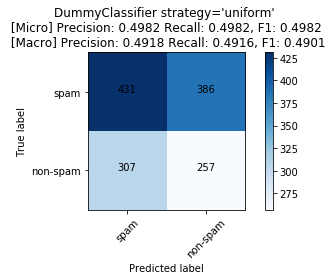

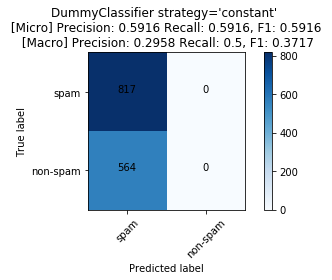

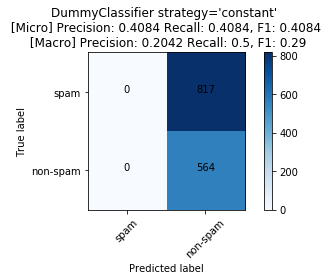

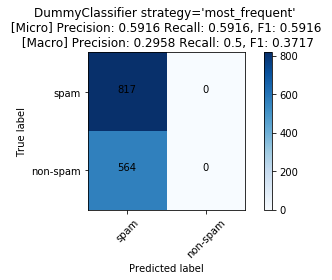

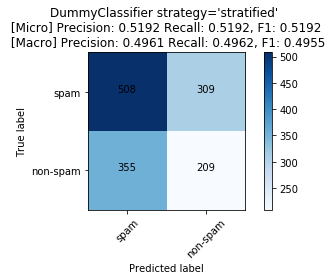

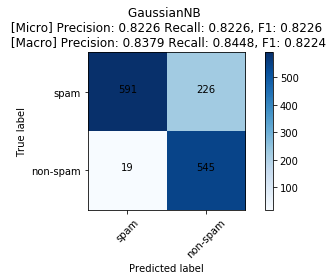

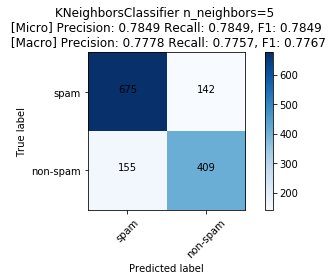

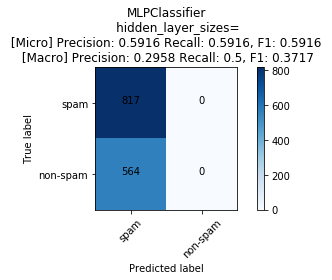

In [21]:
clfs = [dc_uniform, dc_constant_0, dc_constant_1, dc_most_frequent, dc_stratified, gnb, knn, mlp]
plot_report(clfs, X_test, y_test, ["spam", "non-spam"])

Η `barplot_score` εμφανίζει τα δύο ζητούμενα bar plots για τις δύο μετρικές $f1\_micro,\ f1\_macro$. Επειδή τα ονόματα των ταξινομητών είναι αρκετά μεγάλα για τον x-άξονα, στην περίπτωση των __Dummies__ εμφανίζουμε μόνο την στρατηγική που ακολουθεί, ενώ στον __KNeighbors__ των αριθμό των γειτόνων.

In [23]:
def barplot_score(clfs, X_test, y_test):
    if not isinstance(clfs, list):
        clfs = [clfs]
    
    micro_l = []
    macro_l = []
    clf_name = []
    
    for clf in clfs:
        _, _, _, f1_micro, _, _, f1_macro = cnf_score_report(y_test, clf.predict(X_test))
        
        micro_l.append(f1_micro)
        macro_l.append(f1_macro)
        
        if (transfrom_title(str(clf)) == "GaussianNB"):
            clf_name.append("GaussianNB")
        else:
            clf_name.append(transfrom_title(str(clf)).split()[1])
        
    y_pos = np.arange(len(clf_name))
    
    plt.figure(1)
    plt.bar(y_pos, micro_l, align='center', alpha=0.9)
    plt.xticks(y_pos, clf_name, rotation=45)
    plt.ylabel('Score')
    plt.title('f1 micro')
    plt.tight_layout()
    
    plt.figure(2)
    plt.bar(y_pos, macro_l, align='center', alpha=0.9)
    plt.xticks(y_pos, clf_name, rotation=45)
    plt.ylabel('Score')
    plt.title('f1 macro')
    plt.tight_layout()

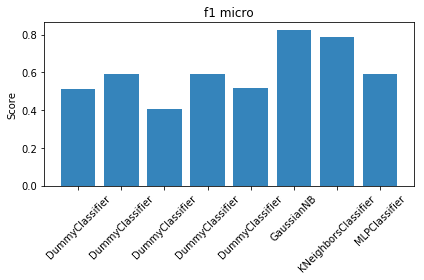

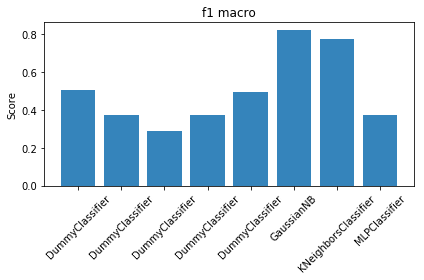

In [23]:
barplot_score(clfs, X_test, y_test)

## Δ. Βελτιστοποίηση ταξινομητών

### kNN.

Θα ξεκινήσουμε με τη βελτιστοποίηση για τον kNN:

In [25]:
from sklearn import neighbors
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
knn_ = neighbors.KNeighborsClassifier(n_jobs=-1) #χρησιμοποιούμε όλους τους πυρήνες του υπολογιστή.

#### kNN αξιολογώντας με f1-macro.

In [26]:
from sklearn.model_selection import GridSearchCV

vthreshold = [0] #δε δέχεται κάτι άλλο.
n_components = [10, 20, 30, 40, 50, 55]

# οι υπερπαραμετροι του ταξινομητή.
k = [1, 6, 11, 21, 31, 41] 
k_weights = ['uniform', 'distance']
k_metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [27]:
# ορίζουμε το pipeline.
pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', knn_)], memory = 'tmp')

In [28]:
# και τον estimator.
estimator_knn_macro = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=k_weights, kNN__metric=k_metric), cv=5, scoring='f1_macro', n_jobs=-1)

In [29]:
import time
start_time = time.time()
estimator_knn_macro.fit(X_train, y_train)
preds_knn_macro = estimator_knn_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_knn_macro))

Συνολικός χρόνος fit και predict: 149.76109790802002 seconds
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       817
           1       0.90      0.91      0.90       564

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



In [30]:
print(estimator_knn_macro.best_estimator_)
print(estimator_knn_macro.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_component...an',
           metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 31, 'kNN__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0}


#### kNN με f1-micro.

In [31]:
estimator_knn_micro = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=k_weights, kNN__metric=k_metric), cv=5, scoring='f1_micro', n_jobs=-1)

In [32]:
import time
start_time = time.time()
estimator_knn_micro.fit(X_train, y_train)
preds_knn_micro = estimator_knn_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_knn_micro ))

Συνολικός χρόνος fit και predict: 147.40819478034973 seconds
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       817
           1       0.90      0.91      0.90       564

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



In [33]:
print(estimator_knn_micro.best_estimator_)
print(estimator_knn_micro.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_component...an',
           metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 31, 'kNN__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0}


Για τον knn βρήκαμε τις εξής βέλτιστες υπερπαραμέτρους: {'metric': 'euclidean', 'neighbors': 31, 'weights': 'distance', 'pca components': 40}

Θα προσπαθήσουμε να τις βελτιώσουμε περαιτέρω, επιλέγοντας αυτή τη φορά τιμές κοντά σε αυτές που βρήκαμε μόλις.

In [34]:
n_components_knn = [37, 38, 39, 40, 41, 42, 43]
k_new = [28, 29, 30, 31, 32, 33, 34, 35]

In [35]:
# με f1 macro.
estimator_knn_macro_new = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components_knn, kNN__n_neighbors=k_new, kNN__weights=k_weights, kNN__metric=k_metric), cv=5, scoring='f1_macro', n_jobs=-1)

In [36]:
start_time = time.time()
estimator_knn_macro_new.fit(X_train, y_train)
preds_knn_macro_new = estimator_knn_macro_new.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_knn_macro_new))

Συνολικός χρόνος fit και predict: 316.47090768814087 seconds
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       817
           1       0.90      0.91      0.90       564

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



In [37]:
print(estimator_knn_macro_new.best_estimator_)
print(estimator_knn_macro_new.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_component...an',
           metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 31, 'kNN__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0}


In [38]:
# με f1 micro.
estimator_knn_micro_new = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components_knn, kNN__n_neighbors=k_new, kNN__weights=k_weights, kNN__metric=k_metric), cv=5, scoring='f1_micro', n_jobs=-1)

In [39]:
start_time = time.time()
estimator_knn_micro_new.fit(X_train, y_train)
preds_knn_micro_new = estimator_knn_micro_new.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_knn_micro_new))

Συνολικός χρόνος fit και predict: 313.1477198600769 seconds
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       817
           1       0.90      0.91      0.90       564

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



In [40]:
print(estimator_knn_micro_new.best_estimator_)
print(estimator_knn_micro_new.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_component...an',
           metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 31, 'kNN__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0}


Παρατηρούμε πως οι τιμές των υπερπαραμέτρων παραμένουν ίδιες, συνεπώς είναι οι βέλτιστες.

### GaussianNB.

Θα ακολουθήσουμε την ίδια διαδικαδία, αυτή τη φορά για τον GaussianNB.

#### gnb με f1-macro.

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb_ = GaussianNB()

var_sm = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('GaussianNB', gnb_)], memory = 'tmp')

In [51]:
estimator_gnb_macro = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components, GaussianNB__var_smoothing=var_sm), cv=5, scoring='f1_macro', n_jobs=-1)

In [52]:
start_time = time.time()
estimator_gnb_macro.fit(X_train, y_train)
preds_gnb_macro = estimator_gnb_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_gnb_macro))

Συνολικός χρόνος fit και predict: 3.617914915084839 seconds
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       817
           1       0.87      0.69      0.77       564

   micro avg       0.83      0.83      0.83      1381
   macro avg       0.84      0.81      0.82      1381
weighted avg       0.83      0.83      0.82      1381



In [53]:
print(estimator_gnb_macro.best_estimator_)
print(estimator_gnb_macro.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('GaussianNB', GaussianNB(priors=None, var_smoothing=0.01))])
{'GaussianNB__var_smoothing': 0.01, 'pca__n_components': 30, 'selector__threshold': 0}


#### gnb με f1-micro.

In [55]:
estimator_gnb_micro = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components, GaussianNB__var_smoothing=var_sm), cv=5, scoring='f1_micro', n_jobs=-1)

In [56]:
start_time = time.time()
estimator_gnb_micro.fit(X_train, y_train)
preds_gnb_micro = estimator_gnb_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_gnb_micro))

Συνολικός χρόνος fit και predict: 3.6362369060516357 seconds
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       817
           1       0.87      0.69      0.77       564

   micro avg       0.83      0.83      0.83      1381
   macro avg       0.84      0.81      0.82      1381
weighted avg       0.83      0.83      0.82      1381



In [57]:
print(estimator_gnb_micro.best_estimator_)
print(estimator_gnb_micro.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('GaussianNB', GaussianNB(priors=None, var_smoothing=0.01))])
{'GaussianNB__var_smoothing': 0.01, 'pca__n_components': 30, 'selector__threshold': 0}


Για τον Gaussian αρχικά βρήκαμε τις παρακάτω βέλτιστες υπερπαραμέτρους: {'var smoothing': 0.01, 'pca components': 30}

Ας ορίσουμε νέες τιμές.

In [58]:
n_components_gnb = [27, 28, 29, 30, 31, 32, 33]
var_sm_new = [0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013]

In [59]:
# με f1 macro.
estimator_gnb_macro_new = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components_gnb, GaussianNB__var_smoothing=var_sm_new), cv=5, scoring='f1_macro', n_jobs=-1)

In [60]:
start_time = time.time()
estimator_gnb_macro_new.fit(X_train, y_train)
preds_gnb_macro_new = estimator_gnb_macro_new.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_gnb_macro_new))

Συνολικός χρόνος fit και predict: 3.1941702365875244 seconds
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       817
           1       0.87      0.68      0.76       564

   micro avg       0.83      0.83      0.83      1381
   macro avg       0.84      0.81      0.81      1381
weighted avg       0.83      0.83      0.82      1381



In [61]:
print(estimator_gnb_macro_new.best_estimator_)
print(estimator_gnb_macro_new.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('GaussianNB', GaussianNB(priors=None, var_smoothing=0.012))])
{'GaussianNB__var_smoothing': 0.012, 'pca__n_components': 30, 'selector__threshold': 0}


In [62]:
# f1 micro.
estimator_gnb_micro_new = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components_gnb, GaussianNB__var_smoothing=var_sm_new), cv=5, scoring='f1_micro', n_jobs=-1)

In [63]:
start_time = time.time()
estimator_gnb_micro_new.fit(X_train, y_train)
preds_gnb_micro_new = estimator_gnb_micro_new.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_gnb_micro_new))

Συνολικός χρόνος fit και predict: 3.1167423725128174 seconds
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       817
           1       0.87      0.68      0.76       564

   micro avg       0.83      0.83      0.83      1381
   macro avg       0.84      0.81      0.81      1381
weighted avg       0.83      0.83      0.82      1381



In [64]:
print(estimator_gnb_micro_new.best_estimator_)
print(estimator_gnb_micro_new.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('GaussianNB', GaussianNB(priors=None, var_smoothing=0.012))])
{'GaussianNB__var_smoothing': 0.012, 'pca__n_components': 30, 'selector__threshold': 0}


Παρατηρούμε πως αυτή τη φορά και με τον f1-macro και f1-micro υπολογίσαμε ότι η καλύτερη τιμή για το var_smoothing είναι ίση με 0.012. Ο n_components παραμένει ίσος με 30.

### dummies.

Συνεχίζουμε με τους dummies.

Τώρα δεν έχουμε υπερπαμέτρους προς βελτιστοποίηση, οπότε τα πράγματα είναι πιο απλά.

In [79]:
# uniform.
# f1 macro.
from sklearn.dummy import DummyClassifier
dc_uni_f1_macro = DummyClassifier(strategy="uniform")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_uni_f1_macro)], memory = 'tmp')
estimator_dc_uni_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator_dc_uni_macro.fit(X_train, y_train)
preds_dc_uni_macro = estimator_dc_uni_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_uni_macro))
print(estimator_dc_uni_macro.best_estimator_)
print(estimator_dc_uni_macro.best_params_)

Συνολικός χρόνος fit και predict: 0.4214136600494385 seconds
              precision    recall  f1-score   support

           0       0.60      0.50      0.54       817
           1       0.41      0.51      0.46       564

   micro avg       0.50      0.50      0.50      1381
   macro avg       0.50      0.50      0.50      1381
weighted avg       0.52      0.50      0.51      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=None, random_state=None, strategy='uniform'))])
{'pca__n_components': 40, 'selector__threshold': 0}


In [80]:
# uniform.
# f1 micro.
dc_uni_f1_micro = DummyClassifier(strategy="uniform")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_uni_f1_micro)], memory = 'tmp')
estimator_dc_uni_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
estimator_dc_uni_micro.fit(X_train, y_train)
preds_dc_uni_micro = estimator_dc_uni_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_uni_micro))
print(estimator_dc_uni_micro.best_estimator_)
print(estimator_dc_uni_micro.best_params_)

Συνολικός χρόνος fit και predict: 0.4247567653656006 seconds
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       817
           1       0.42      0.49      0.45       564

   micro avg       0.51      0.51      0.51      1381
   macro avg       0.51      0.51      0.51      1381
weighted avg       0.52      0.51      0.52      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=None, random_state=None, strategy='uniform'))])
{'pca__n_components': 50, 'selector__threshold': 0}


In [81]:
# constant 0.
# f1 macro.
from sklearn.dummy import DummyClassifier
dc_con_0_f1_macro = DummyClassifier(strategy="constant", constant=0)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_con_0_f1_macro)], memory = 'tmp')
estimator_dc_con_0_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator_dc_con_0_macro.fit(X_train, y_train)
preds_dc_con_0_macro = estimator_dc_con_0_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_con_0_macro))
print(estimator_dc_con_0_macro.best_estimator_)
print(estimator_dc_con_0_macro.best_params_)

Συνολικός χρόνος fit και predict: 0.4247562885284424 seconds
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       817
           1       0.00      0.00      0.00       564

   micro avg       0.59      0.59      0.59      1381
   macro avg       0.30      0.50      0.37      1381
weighted avg       0.35      0.59      0.44      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=0, random_state=None, strategy='constant'))])
{'pca__n_components': 10, 'selector__threshold': 0}


In [82]:
#constant 0
# f1 micro.
from sklearn.dummy import DummyClassifier
dc_con_0_f1_micro = DummyClassifier(strategy="constant", constant=0)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_con_0_f1_micro)], memory = 'tmp')
estimator_dc_con_0_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
estimator_dc_con_0_micro.fit(X_train, y_train)
preds_dc_con_0_micro = estimator_dc_con_0_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_con_0_micro))
print(estimator_dc_con_0_micro.best_estimator_)
print(estimator_dc_con_0_micro.best_params_)

Συνολικός χρόνος fit και predict: 0.40486621856689453 seconds
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       817
           1       0.00      0.00      0.00       564

   micro avg       0.59      0.59      0.59      1381
   macro avg       0.30      0.50      0.37      1381
weighted avg       0.35      0.59      0.44      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=0, random_state=None, strategy='constant'))])
{'pca__n_components': 10, 'selector__threshold': 0}


In [70]:
# constant 1.
# f1 macro.
from sklearn.dummy import DummyClassifier
dc_con_1_f1_macro = DummyClassifier(strategy="constant", constant=1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_con_1_f1_macro)], memory = 'tmp')
estimator_dc_con_1_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator_dc_con_1_macro.fit(X_train, y_train)
preds_dc_con_1_macro = estimator_dc_con_1_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_con_1_macro))
print(estimator_dc_con_1_macro.best_estimator_)
print(estimator_dc_con_1_macro.best_params_)

Συνολικός χρόνος fit και predict: 0.4197502136230469 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       817
           1       0.41      1.00      0.58       564

   micro avg       0.41      0.41      0.41      1381
   macro avg       0.20      0.50      0.29      1381
weighted avg       0.17      0.41      0.24      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=1, random_state=None, strategy='constant'))])
{'pca__n_components': 10, 'selector__threshold': 0}


In [71]:
# constant 1.
# f1 micro.
from sklearn.dummy import DummyClassifier
dc_con_1_f1_micro = DummyClassifier(strategy="constant", constant=1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_con_1_f1_micro)], memory = 'tmp')
estimator_dc_con_1_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
estimator_dc_con_1_micro.fit(X_train, y_train)
preds_dc_con_1_micro = estimator_dc_con_1_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_con_1_micro))
print(estimator_dc_con_1_micro.best_estimator_)
print(estimator_dc_con_1_micro.best_params_)

Συνολικός χρόνος fit και predict: 0.41082072257995605 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       817
           1       0.41      1.00      0.58       564

   micro avg       0.41      0.41      0.41      1381
   macro avg       0.20      0.50      0.29      1381
weighted avg       0.17      0.41      0.24      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=1, random_state=None, strategy='constant'))])
{'pca__n_components': 10, 'selector__threshold': 0}


In [72]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [73]:
# most frequent.
# f1 macro.
from sklearn.dummy import DummyClassifier
dc_freq_f1_macro = DummyClassifier(strategy="most_frequent")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_freq_f1_macro)], memory = 'tmp')
estimator_dc_freq_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator_dc_freq_macro.fit(X_train, y_train)
preds_dc_freq_macro = estimator_dc_freq_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_freq_macro))
print(estimator_dc_freq_macro.best_estimator_)
print(estimator_dc_freq_macro.best_params_)

Συνολικός χρόνος fit και predict: 0.40398454666137695 seconds
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       817
           1       0.00      0.00      0.00       564

   micro avg       0.59      0.59      0.59      1381
   macro avg       0.30      0.50      0.37      1381
weighted avg       0.35      0.59      0.44      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=None, random_state=None, strategy='most_frequent'))])
{'pca__n_components': 10, 'selector__threshold': 0}


In [74]:
# f1 micro.
from sklearn.dummy import DummyClassifier
dc_freq_f1_micro = DummyClassifier(strategy="most_frequent")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_freq_f1_micro)], memory = 'tmp')
estimator_dc_freq_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
estimator_dc_freq_micro.fit(X_train, y_train)
preds_dc_freq_micro = estimator_dc_freq_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_freq_micro))
print(estimator_dc_freq_micro.best_estimator_)
print(estimator_dc_freq_micro.best_params_)

Συνολικός χρόνος fit και predict: 0.41869473457336426 seconds
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       817
           1       0.00      0.00      0.00       564

   micro avg       0.59      0.59      0.59      1381
   macro avg       0.30      0.50      0.37      1381
weighted avg       0.35      0.59      0.44      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=None, random_state=None, strategy='most_frequent'))])
{'pca__n_components': 10, 'selector__threshold': 0}


In [75]:
# stratified.
# f1 macro.
from sklearn.dummy import DummyClassifier
dc_strat_f1_macro = DummyClassifier(strategy="stratified")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_strat_f1_macro)], memory = 'tmp')
estimator_dc_strat_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator_dc_strat_macro.fit(X_train, y_train)
preds_dc_strat_macro = estimator_dc_strat_macro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_strat_macro))
print(estimator_dc_strat_macro.best_estimator_)
print(estimator_dc_strat_macro.best_params_)

Συνολικός χρόνος fit και predict: 0.4301259517669678 seconds
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       817
           1       0.40      0.49      0.44       564

   micro avg       0.49      0.49      0.49      1381
   macro avg       0.49      0.49      0.49      1381
weighted avg       0.51      0.49      0.50      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=None, random_state=None, strategy='stratified'))])
{'pca__n_components': 50, 'selector__threshold': 0}


In [76]:
# stratified.
# f1 micro.
from sklearn.dummy import DummyClassifier
dc_strat_f1_micro = DummyClassifier(strategy="stratified")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('DummyClassifier', dc_strat_f1_micro)], memory = 'tmp')
estimator_dc_strat_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
estimator_dc_strat_micro.fit(X_train, y_train)
preds_dc_strat_micro = estimator_dc_strat_micro.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds_dc_strat_micro))
print(estimator_dc_strat_micro.best_estimator_)
print(estimator_dc_strat_micro.best_params_)

Συνολικός χρόνος fit και predict: 0.4187180995941162 seconds
              precision    recall  f1-score   support

           0       0.60      0.50      0.55       817
           1       0.42      0.52      0.46       564

   micro avg       0.51      0.51      0.51      1381
   macro avg       0.51      0.51      0.51      1381
weighted avg       0.53      0.51      0.51      1381

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=55, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('DummyClassifier', DummyClassifier(constant=None, random_state=None, strategy='stratified'))])
{'pca__n_components': 55, 'selector__threshold': 0}


Βρήκαμε λοιπόν πως για τη στρατηγική 'uniform' με f1-macro βρίσκουμε βέλτιστους n_components = 40 και για f1-micro = 50. Σημειώνεται βέβαια πως λόγω της φύσης της uniform, αν τρέξουμε ξανά τα αντίστοιχα κελιά θα βρούμε άλλες τιμές.

Για την 'constant 0' και με τους 2 τρόπους καταλήγουμε σε n_components = 10.

Στις 'constant 1' και 'most frequent' καταλήγουμε επίσης σε n_components = 10.

Στην 'stratified' με τη f1-macro υπολογίζουμε n_components = 50, ενώ με την f1-micro σε 55.